In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer.pitch import VerticalPitch
import seaborn as sns
from mplsoccer.pitch import Pitch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
df = pd.read_csv('/Users/calvi/Downloads/match_events_rows.csv')

In [3]:
#convert the data to match the mplsoccer statsbomb pitch
#to see how to create the pitch, watch the video here: https://www.youtube.com/watch?v=55k1mCRyd2k
df['x'] = df['x']*1.2
df['y'] = df['y']*.8
df['end_x'] = df['end_x']*1.2
df['end_y'] = df['end_y']*.8

In [4]:
df = df[df['player_id']== 318871]

In [5]:
#Import xT Grid, turn it into an array, and then get how many rows and columns it has
xT = pd.read_csv("/Users/calvi/Downloads/xT_Grid.csv", header=None)
xT = np.array(xT)
xT_rows, xT_cols = xT.shape

In [6]:
xT

array([[0.00638303, 0.00779616, 0.00844854, 0.00977659, 0.01126267,
        0.01248344, 0.01473596, 0.0174506 , 0.02122129, 0.02756312,
        0.03485072, 0.0379259 ],
       [0.00750072, 0.00878589, 0.00942382, 0.0105949 , 0.01214719,
        0.0138454 , 0.01611813, 0.01870347, 0.02401521, 0.02953272,
        0.04066992, 0.04647721],
       [0.0088799 , 0.00977745, 0.01001304, 0.01110462, 0.01269174,
        0.01429128, 0.01685596, 0.01935132, 0.0241224 , 0.02855202,
        0.05491138, 0.06442595],
       [0.00941056, 0.01082722, 0.01016549, 0.01132376, 0.01262646,
        0.01484598, 0.01689528, 0.0199707 , 0.02385149, 0.03511326,
        0.10805102, 0.25745362],
       [0.00941056, 0.01082722, 0.01016549, 0.01132376, 0.01262646,
        0.01484598, 0.01689528, 0.0199707 , 0.02385149, 0.03511326,
        0.10805102, 0.25745362],
       [0.0088799 , 0.00977745, 0.01001304, 0.01110462, 0.01269174,
        0.01429128, 0.01685596, 0.01935132, 0.0241224 , 0.02855202,
        0.05491138,

In [7]:
print(xT_rows,xT_cols)

8 12


In [8]:
#Bin Data for xT

# We use a pandas method called .cut --> https://pandas.pydata.org/docs/reference/api/pandas.cut.html
# We say labels=False because we want the integer locator of the bin
df['x1_bin'] = pd.cut(df['x'], bins=xT_cols, labels=False)
df['y1_bin'] = pd.cut(df['y'], bins=xT_rows, labels=False)
df['x2_bin'] = pd.cut(df['end_x'], bins=xT_cols, labels=False)
df['y2_bin'] = pd.cut(df['end_y'], bins=xT_rows, labels=False)

In [9]:
columns_to_fill = ['x1_bin', 'y1_bin', 'x2_bin', 'y2_bin']

# Fill NaN values with 0 in the specified columns
df[columns_to_fill] = df[columns_to_fill].fillna(0)

In [10]:
df['start_zone_value'] = df[['x1_bin', 'y1_bin']].apply(lambda x: xT[int(x[1])][int(x[0])], axis=1)
df['end_zone_value'] = df[['x2_bin', 'y2_bin']].apply(lambda x: xT[int(x[1])][int(x[0])], axis=1)

/var/folders/8_/_mkv7dtj7hvfvhvj31qsy35h0000gn/T/ipykernel_72284/365272619.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['start_zone_value'] = df[['x1_bin', 'y1_bin']].apply(lambda x: xT[int(x[1])][int(x[0])], axis=1)
/var/folders/8_/_mkv7dtj7hvfvhvj31qsy35h0000gn/T/ipykernel_72284/365272619.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['end_zone_value'] = df[['x2_bin', 'y2_bin']].apply(lambda x: xT[int(x[1])][int(x[0])], axis=1)


In [11]:
df.head()

,id,event_id,minute,second,team_id,player_id,x,y,end_x,end_y,...,is_goal,type_display_name,outcome_type_display_name,period_display_name,x1_bin,y1_bin,x2_bin,y2_bin,start_zone_value,end_zone_value
15,2586225383,10,0,40,26,318871,26.52,7.44,32.40,26.88,...,False,Pass,Successful,FirstHalf,2,0,3.0,2.0,0.008449,0.011105
20,2586225717,14,1,0,26,318871,65.64,0.00,41.04,17.84,...,False,Pass,Successful,FirstHalf,6,0,4.0,1.0,0.014736,0.012147
45,2586228005,28,2,39,26,318871,119.40,0.40,98.16,52.16,...,False,Pass,Successful,FirstHalf,11,0,9.0,5.0,0.037926,0.028552
64,2586230621,40,4,43,26,318871,46.44,53.28,38.76,61.68,...,False,Pass,Successful,FirstHalf,4,5,3.0,6.0,0.012692,0.010595
72,2586231059,47,5,5,26,318871,46.68,18.72,63.36,6.00,...,False,Pass,Successful,FirstHalf,4,1,6.0,0.0,0.012147,0.014736


In [12]:
# now we find the difference between the start and end to get the xT value
df['xT'] = df['end_zone_value'] - df['start_zone_value']

In [13]:
df.head()

,id,event_id,minute,second,team_id,player_id,x,y,end_x,end_y,...,type_display_name,outcome_type_display_name,period_display_name,x1_bin,y1_bin,x2_bin,y2_bin,start_zone_value,end_zone_value,xT
15,2586225383,10,0,40,26,318871,26.52,7.44,32.40,26.88,...,Pass,Successful,FirstHalf,2,0,3.0,2.0,0.008449,0.011105,0.002656
20,2586225717,14,1,0,26,318871,65.64,0.00,41.04,17.84,...,Pass,Successful,FirstHalf,6,0,4.0,1.0,0.014736,0.012147,-0.002589
45,2586228005,28,2,39,26,318871,119.40,0.40,98.16,52.16,...,Pass,Successful,FirstHalf,11,0,9.0,5.0,0.037926,0.028552,-0.009374
64,2586230621,40,4,43,26,318871,46.44,53.28,38.76,61.68,...,Pass,Successful,FirstHalf,4,5,3.0,6.0,0.012692,0.010595,-0.002097
72,2586231059,47,5,5,26,318871,46.68,18.72,63.36,6.00,...,Pass,Successful,FirstHalf,4,1,6.0,0.0,0.012147,0.014736,0.002589


In [14]:
df['xT'].sum()

13.194241909999999

In [15]:
df = df[df['outcome_type_display_name'] == 'Successful'].nlargest(20, 'xT')

In [16]:
df

,id,event_id,minute,second,team_id,player_id,x,y,end_x,end_y,...,type_display_name,outcome_type_display_name,period_display_name,x1_bin,y1_bin,x2_bin,y2_bin,start_zone_value,end_zone_value,xT
12414,2626574809,784,70,54,26,318871,81.60,12.24,114.12,46.08,...,Pass,Successful,SecondHalf,8,1,11.0,4.0,0.024015,0.257454,0.233438
26739,2617164663,485,48,58,26,318871,89.52,57.12,115.08,37.12,...,Pass,Successful,FirstHalf,8,5,11.0,3.0,0.024122,0.257454,0.233331
38224,2614045455,836,69,34,26,318871,89.76,54.96,115.32,35.44,...,Pass,Successful,SecondHalf,8,5,11.0,3.0,0.024122,0.257454,0.233331
12392,2626573347,771,69,7,26,318871,119.40,0.40,114.60,39.28,...,Pass,Successful,SecondHalf,11,0,11.0,3.0,0.037926,0.257454,0.219528
19186,2624646167,944,83,47,26,318871,119.40,0.40,112.80,38.80,...,Pass,Successful,SecondHalf,11,0,11.0,3.0,0.037926,0.257454,0.219528
28908,2623117005,931,84,51,26,318871,119.40,79.60,110.04,48.16,...,Pass,Successful,SecondHalf,11,7,11.0,4.0,0.037926,0.257454,0.219528
30970,2610416833,122,7,42,26,318871,119.40,0.40,113.64,41.12,...,Pass,Successful,FirstHalf,11,0,11.0,4.0,0.037926,0.257454,0.219528
32709,2625777255,196,20,44,26,318871,119.40,79.60,110.04,36.80,...,Pass,Successful,FirstHalf,11,7,11.0,3.0,0.037926,0.257454,0.219528
32736,2625778639,212,22,54,26,318871,112.56,72.96,110.16,32.00,...,Pass,Successful,FirstHalf,11,7,11.0,3.0,0.037926,0.257454,0.219528
32951,2625787473,373,36,36,26,318871,119.52,0.56,110.64,42.08,...,Pass,Successful,FirstHalf,11,0,11.0,4.0,0.037926,0.257454,0.219528


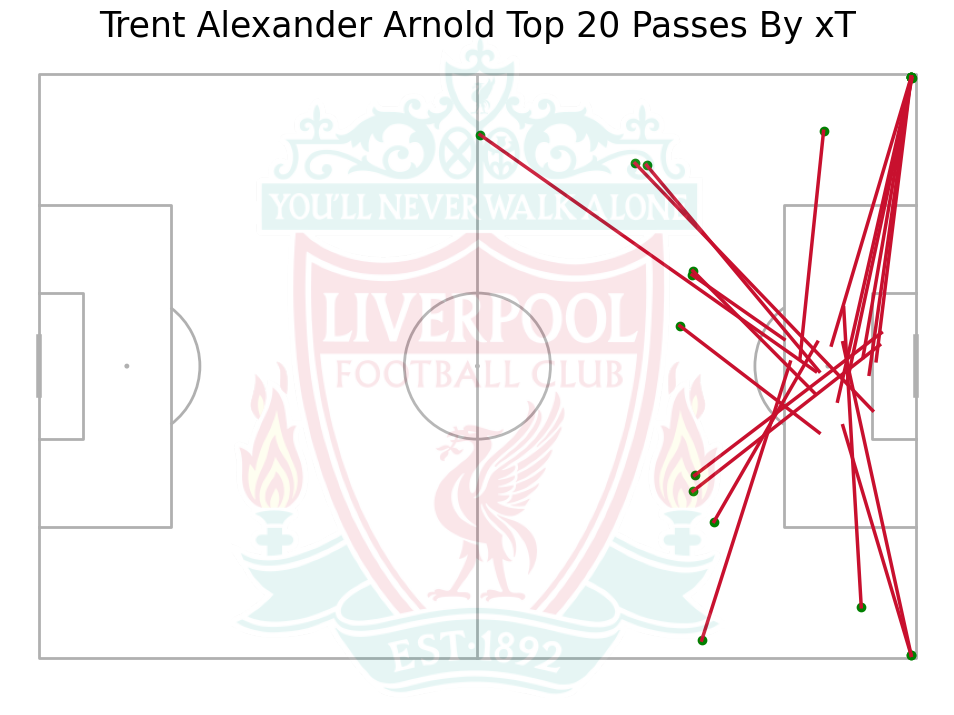

In [17]:
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
pitch = Pitch(half=False)

fig, ax = pitch.draw(figsize=(13.5, 8))
fig.set_facecolor('white')
ax.patch.set_facecolor('white')

# Use a for loop to plot each pass
for idx, row in df.iterrows():
    if row['outcome_type_display_name'] == 'Successful':
        # Adjust the linewidth for successful passes
        plt.plot((row['x'], row['end_x']), (row['y'], row['end_y']), color='#C8102E', linewidth=2.5)
        plt.scatter(row['x'], row['y'], color='green')
    elif row['outcome_type_display_name'] == 'Unsuccessful':
        # Adjust the linewidth for unsuccessful passes
        plt.plot((row['x'], row['end_x']), (row['y'], row['end_y']), color='red', linewidth=.6)
        plt.scatter(row['x'], row['y'], color='red')

# Add transparent logo in the middle of the plot
logo_path = '/Users/calvi/Downloads/team_logos/liverpool_logo.png'  # Replace with the path to your logo image
logo = plt.imread(logo_path)
imagebox = OffsetImage(logo, zoom=.8, alpha=0.1)
ab = AnnotationBbox(imagebox, (0.5, 0.5), xycoords='axes fraction', boxcoords="axes fraction", frameon=False)
ax.add_artist(ab)

plt.title('Trent Alexander Arnold Top 20 Passes By xT', color='black', size=25)
plt.show()